{"categories": [{"name": "others_", "score": 0.00390625}, {"name": "outdoor_", "score": 0.00390625, "detail": {"landmarks": []}}, {"name": "outdoor_road", "score": 0.578125, "detail": {"landmarks": []}}], "color": {"dominantColorForeground": "White", "dominantColorBackground": "Grey", "dominantColors": ["Grey"], "accentColor": "8D4E3E", "isBwImg": false, "isBWImg": false}, "description": {"tags": ["game", "sport", "racket", "court", "road", "outdoor", "holding", "person", "woman", "girl", "young", "playing", "standing", "player", "ready", "female", "hand", "preparing", "ball", "net", "man", "red", "swinging", "people"], "captions": [{"text": "a girl holding a racket on a court", "confidence": 0.9278895096350035}]}, "requestId": "b45670e7-c560-4271-a7f5-f75d1f55d0cc", "metadata": {"width": 398, "height": 599, "format": "Jpeg"}}


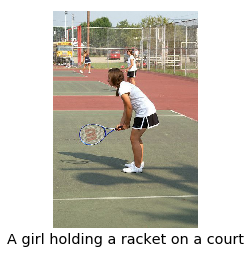

In [18]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "5c480117dc414d76a5916eb1da54b72b"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/CocoPhotoShaun.jpg/398px-CocoPhotoShaun.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(json.dumps(response.json()))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()